# Major  Components of Machine Learning

<img src="AMLProblem.png" alt="Drawing" style="width: 600px;"/>

1. data points as the basic unit of information; data points are characterized by features (can be measured easily) and labels (high-level information that is difficult to acquire). 
2. a hypothesis space (also referred to as a ML model) consisting of computationally feasible predictor functions. 
3. a loss function that is used to assess the quality of a particular predictor function. 

To implement ML methods, we need to be able to efficiently **store and manipulate** data and predictor functions.  A quite powerful tool to represent and manipulate data and predictor functions are [matrices and vectors](https://en.wikipedia.org/wiki/Matrix_(mathematics)). 

Indeed, data points can often characterized by a list of numeric attributes, or "features", $x_{r}$ which can be stacked conveniently into a vector $\mathbf{x}=\big(x_{1},\ldots,x_{n}\big)^{T}$. Moreover, many ML methods (such as linear regression or logistic regression) use predictor functions of the form $h(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x}$ with some weight vector $\mathbf{w}$. Note that once we restrict ourselves to linear functions of the form $h(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x}$, we can represent a predictor function by the weight vector $\mathbf{w}$. Indeed, given the weight vector $\mathbf{w}$, we can evaluate the predictor function for any feature vector $\mathbf{x}$ as $h(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x}$. 

## Matrices and Vectors
<a id="Q1"></a>

The Python library `numpy`, provides implementations of many useful matrix and vector operations, e.g. matrix multiplication or computing an eigenvalue decomposition. 
A matrix 
\begin{equation}
\mathbf{X}  = \begin{pmatrix} X_{1,1} & X_{1,2}& \ldots & X_{1,n} \\ 
X_{2,1} & X_{2,2}& \ldots & X_{2,n} \\ 
\vdots & \vdots & \vdots & \vdots \\ 
X_{m,1} & X_{m,2} & \ldots & X_{m,n} \end{pmatrix}\in \mathbb{R}^{m \times n}
\end{equation} 
is represented as a numpy array of shape (m,n). A vector 
\begin{equation}
\mathbf{x}  = \begin{pmatrix} x_{1} \\ x_{2} \\ \vdots \\ x_{m} \end{pmatrix}\in \mathbb{R}^{m}
\end{equation} 
is represented as a numpy array of shape (m,1). 

<a id='LoadDataset'></a>
<div class=" alert alert-info">
    <b>Demo.</b> Vector and Matrix. 
    
The code snippet below creates a [numpy array](http://cs231n.github.io/python-numpy-tutorial/#numpy-arrays) `X` of shape (2,3) to represent the matrix 
$
\mathbf{X} = \begin{pmatrix} 11 & 12 & 13 \\ 21 & 22 & 23 \end{pmatrix}.\\
$
The entry $X_{1,1}$ is accessed via the Python expression `X[0,0]` since in Python the indexing of arrays starts with $0$ instead of $1$. 
</div>

In [2]:
from IPython.display import display, Math
import numpy as np  

X = np.array([[11,12,13],[21,22,23]]) 

print(" X = \n",X)
print("shape of X ",X.shape)
display(Math(r'$X_{1,1}=%02.2f' % X[0,0]))
display(Math(r'$X_{2,1}=%02.2f' % X[1,0]))

 X = 
 [[11 12 13]
 [21 22 23]]
shape of X  (2, 3)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<a id='LoadDataset'></a>
<div class=" alert alert-info">
    <b>Demo.</b> Creating Matrices and Vectors. 
  
<p>
The code snippet below demonstrates how to create numpy arrays of different shapes. 
A numpy array of shape $(m,n)$ represents a matrix 
with $m$ rows and $n$ columns. A vector of length $m$ will be considered as a matrix with one single column 
and therefore be represented by a numpy array of shape $(m,1)$. 
</p>

</div>

In [3]:
# Important libraries to import:
# NumPy: is the fundamental package for matrix computations
# matplotlib.pyplot: provides convenient functions for plotting data 

import numpy as np # use shorthand "np" for the numpy library ("package")


# let's create a vector a of length 9:
a = np.array([1,2,3,4,5,6,7,8,9]).reshape(-1,1)
dimension=np.shape(a)
rows = dimension[0]
print("now we have a vector a =\n",a) 
print("the vector a has", rows, "elements")
print("the vector is represented by a numpy array of shape", a.shape, "\n")

# create a 2 x 2 matrix, denoted B, which contains only zero entries
B = np.zeros((2,2))
print("now we have a matrix B = \n",B)
dimension=np.shape(B)      # determine dimensions of matrix B
rows = dimension[0]        # first element of dimension is the number of rows 
cols = dimension[1]        # second element of "dimension" is the number of cols
print("the matrix B has", rows, "rows and", cols, "columns \n")

# You can use the numpy function `np.ones(n)` to generate a vector of ones (e.g. `[1,1,1, ..., 1]`) 

x = np.ones(5).reshape(-1,1) 
print("the vector x =\n", x)

now we have a vector a =
 [[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
the vector a has 9 elements
the vector is represented by a numpy array of shape (9, 1) 

now we have a matrix B = 
 [[0. 0.]
 [0. 0.]]
the matrix B has 2 rows and 2 columns 

the vector x =
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


<a id='LoadDataset'></a>
<div class=" alert alert-info">
    <b>Demo.</b> Matrix Mulplication. 
  
The code snippet below implements a Python function `C, rows, cols = Matrix_multiplication(A, B)` which reads in two matrices $\mathbf{A}$ and $\mathbf{B}$ and returns the product $\mathbf{C}=\mathbf{A} \mathbf{B}$ along with the number of rows and columns of the resulting matrix. This demonstrates how to declare a function with multiple input and output parameters.
</div>

In [4]:
def Matrix_multiplication(A, B):
    """
    Compute the matrix multiplication A*B and its shape
    
    :param A: array-like, shape=(m, n)
    :param B: array-like, shape=(o, p)
    
    :return: The matrix being the result of the multiplication, the number of rows and the number columns 
    """
    #We now construct another matrix H by multiplying the matrices A and B using the function np.dot():
    H = np.dot(A,B)
    shape = H.shape
    
    # A matrix that is the product of two matrices with r1 and r2 rows
    # and c1 and c2 columns will have r1 rows and c2 columns 
    
    rows = shape[0]
    cols = shape[1]
    
    return H, rows, cols

<a id='LoadDataset'></a>
<div class=" alert alert-info">
    <b>Demo.</b> Matrix Operations. 
  
<p>
The code snippet below shows how to create numpy array that represent matrices and vectors and how to perform 
certain operations. 
</p>

</div>

In [6]:
# create two 3*3 matrices C and I:
C = np.array([[1,4,0],[3,2,5],[6,2,1]])
I = np.eye(3)

print("C = \n",C)
print("I = \n",I)

D, rows, cols = Matrix_multiplication(C,I)

print("D = C * I = \n",D)
print("\n") # create a line break 


# remember that indexing starts at 0 in Python ! 

secondcol = D[:,1]   # read second column of D into array `secondcol` 
secondrow = D[1,:]   # read second row of D into array `secondrow`

print("second column of D =", secondcol)
print("second row of D =", secondrow)
print("\n") # create a line break 

# let us now determine the size of a matrix that 
# is obtained as the product of two other matrices F and G
F = np.array([[1,2],[3,4],[5,6]])

print("now we have a matrix F = \n", F)
print("\n the matrix F has", F.shape[0], "rows and", F.shape[1], "columns\n")
print("\n") # create a line break 

G = np.array([[1, 2, 3], [3, 4, 5]])

print("now we have a matrix G = \n", G)
print("\n the matrix G has", G.shape[0], "rows and", G.shape[1], "columns\n")

# what will be the size of F*G ?
H, rows, cols = Matrix_multiplication(F,G)

print("the product H=F*G is H = \n", H)
print("\n the matrix H has", rows, "rows and", cols, "columns\n")

# In the last step we want to take a look at how to build a 3-dimensional array
# by using the np.array() method

# you can also create a 3 dimensional array by using np.empty, np.zeros etc. 
# and specifying a third parameter e.g. np.zeros((2,3,4))

L = np.array([[[0, 1],[2, 3]], [[4, 5],[6, 7]], [[9,10],[11,12]]]) #size 2,2,3

print("L = \n", L) #you can see it as 3 matrices of size 2x2 each

C = 
 [[1 4 0]
 [3 2 5]
 [6 2 1]]
I = 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
D = C * I = 
 [[1. 4. 0.]
 [3. 2. 5.]
 [6. 2. 1.]]


second column of D = [4. 2. 2.]
second row of D = [3. 2. 5.]


now we have a matrix F = 
 [[1 2]
 [3 4]
 [5 6]]

 the matrix F has 3 rows and 2 columns



now we have a matrix G = 
 [[1 2 3]
 [3 4 5]]

 the matrix G has 2 rows and 3 columns

the product H=F*G is H = 
 [[ 7 10 13]
 [15 22 29]
 [23 34 45]]

 the matrix H has 3 rows and 3 columns

L = 
 [[[ 0  1]
  [ 2  3]]

 [[ 4  5]
  [ 6  7]]

 [[ 9 10]
  [11 12]]]


<a id='LoadDataset'></a>
<div class=" alert alert-info">
    <b>Demo.</b> Dictionary of Wine Data. 

The code snippet below demonstrates how to read in a toy dataset using a Python library `sklearn` and store it in a dictionary `wine`. This dataset contains information about several wine samples. Each wine sample is characterized by a set of features (which can be read out using `wine['data']`) and a wine category (which can be read out using `wine['target']`). 

<div>

In [7]:
# Dictionaries can contain vectors/matrices as values

# Loading wine dataset
from sklearn import datasets
wine = datasets.load_wine() # loading the wine dataset from sklearn datasets

# keys are strings and values are vectors/matrices
X = wine['data']   # read in the value for the key "data"
y = wine['target'] # read in the value for the key "target"

# print out the shape of the vectors/matrices
print('data:\t\t', X.shape, '\nlabels shape:\t', y.shape)
print('------------------------------------------------')
# print the feature names in the dataset, key is a string, value is an array of string
print(wine['feature_names'])

data:		 (178, 13) 
labels shape:	 (178,)
------------------------------------------------
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


<a id="Q3"></a>

## Let's Grab Data!

One of the key components of any machine learning problem (and method) is data. There are many different sources of data such as files stored on a hard-disk or internet databases such as [Wikidata](https://www.wikidata.org/wiki/Wikidata:Main_Page). Another source of data is provided in ready-made Python functions which load specific toy datasets https://scikit-learn.org/stable/datasets/index.html. 


In [8]:
import pandas as pd             # use shorthand "pd" for lib "pandas" which provides methods for 
                                # loading and saving data from and to files

def LoadData(filename):
    """
    Load the dataframe reading the file with the filename given as a parameter.
    Print the sample size m and the feature length n.

    :input: String path to the file

    :return: numpy array of shape=(m, n), the sample size m and the feature length n    
    """

    df = pd.read_csv(filename)
    X = df.values # convert the data frame to numpy array

    n = X.shape[0]  
    m = X.shape[1]
    print('sample size m=', n)
    print('feature length n=', m)
    #raise NotImplementedError()

    return X, m, n

The code snippet below executes the function `LoadData` and performs some tests. 

In [9]:
X, m, n = LoadData("Data.csv")
assert X.shape == (600,2), f'Expected dataframe to be of different size than {df.shape}'


print("Sanity checks passed! Some hidden tests may still fail.")


sample size m= 600
feature length n= 2
Sanity checks passed! Some hidden tests may still fail.


In [10]:
# Load the dataset and store data and labels in variables
from sklearn import datasets

linnerud = datasets.load_linnerud() 
#print(linnerud)
#raise NotImplementedError()

X = linnerud['data'] 
# YOUR CODE HERE
#raise NotImplementedError()
print(X)
print('Shape of X matrix:', X.shape)
print("Exercise - 20 observations on 3 exercise variables: Chins, Situps and Jumps.")
print('\n')

# Target also contains three variables, Weight, Waist and Pulse. Here we will use only the weight variable.
Y = linnerud['target']
# YOUR CODE HERE
#raise NotImplementedError()
print('shape of matrix Y:', Y.shape)
print("20 data points, each containing values of 3 physiological variables: Weight, Waist and Pulse.")
print(Y)

[[  5. 162.  60.]
 [  2. 110.  60.]
 [ 12. 101. 101.]
 [ 12. 105.  37.]
 [ 13. 155.  58.]
 [  4. 101.  42.]
 [  8. 101.  38.]
 [  6. 125.  40.]
 [ 15. 200.  40.]
 [ 17. 251. 250.]
 [ 17. 120.  38.]
 [ 13. 210. 115.]
 [ 14. 215. 105.]
 [  1.  50.  50.]
 [  6.  70.  31.]
 [ 12. 210. 120.]
 [  4.  60.  25.]
 [ 11. 230.  80.]
 [ 15. 225.  73.]
 [  2. 110.  43.]]
Shape of X matrix: (20, 3)
Exercise - 20 observations on 3 exercise variables: Chins, Situps and Jumps.


shape of matrix Y: (20, 3)
20 data points, each containing values of 3 physiological variables: Weight, Waist and Pulse.
[[191.  36.  50.]
 [189.  37.  52.]
 [193.  38.  58.]
 [162.  35.  62.]
 [189.  35.  46.]
 [182.  36.  56.]
 [211.  38.  56.]
 [167.  34.  60.]
 [176.  31.  74.]
 [154.  33.  56.]
 [169.  34.  50.]
 [166.  33.  52.]
 [154.  34.  64.]
 [247.  46.  50.]
 [193.  36.  46.]
 [202.  37.  62.]
 [176.  37.  54.]
 [157.  32.  52.]
 [156.  33.  54.]
 [138.  33.  68.]]


<a id='wikidata'></a>
<div class=" alert alert-info">
    <b>Demo.</b> Load Data from https://www.wikidata.org/. 
 

The code snippet below shows how to query data from https://www.wikidata.org/ in order to obtain current statistics about countries belonging to the European Union (EU). Beside reading in data from wikidata, the code below also shows how to fill in (impute) missing data (fields having a "NaN"). In order to fill missing data fields, different methods can be used. The basic idea behind imputation methods is to interpolate between similar data points. The code below implements a simple interpolation by using the mean of all known values of the same property (or feature).  


</div>

In [11]:
import requests
import pandas as pd
from collections import OrderedDict
import matplotlib.pyplot as plt

# E.g. read in key figures (gdp, average age, population, ...) of all countries.
# only EU countries: ?country wdt:P463 wd:Q458

url = 'https://query.wikidata.org/sparql'
query = """
SELECT
  ?countryLabel ?population ?area ?medianIncome ?age ?nominalGDP
WHERE {
  ?country wdt:P463 wd:Q458
  OPTIONAL { ?country wdt:P1082 ?population }
  OPTIONAL { ?country wdt:P2046 ?area }
  OPTIONAL { ?country wdt:P3529 ?medianIncome }
  OPTIONAL { ?country wdt:P571 ?inception.
    BIND(year(now()) - year(?inception) AS ?age)
  }
  OPTIONAL { ?country wdt:P2131 ?nominalGDP}
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
"""

r = requests.get(url, params={'format': 'json', 'query': query}) #execute the query
data = r.json()

countries = []
#cleans the data because some values are missing
for item in data['results']['bindings']:
    countries.append(OrderedDict({'country': item['countryLabel']['value'],
'population': item['population']['value']
    if 'population' in item else None,
'area': item['area']['value']
    if 'area' in item else None,
'medianIncome': item['medianIncome']['value']
    if 'medianIncome' in item else None,
'age': item['age']['value']
    if 'age' in item else None,
'nominalGDP': item['nominalGDP']['value']
    if 'nominalGDP' in item else None}))

df_wikidata=pd.DataFrame(countries)
df_wikidata.set_index('country', inplace=True)
df_wikidata=df_wikidata.astype({'population': float, 'area': float, 'medianIncome': float, 'age': float, 'nominalGDP': float})
df_wikidata=df_wikidata.astype({'area': float, 'medianIncome': float, 'age': float, 'nominalGDP': float})
print("raw data")
print("========\n")
print(df_wikidata)

df_wikidata.fillna(df_wikidata.mean(), inplace=True)   # replace missing data "Nan" with means 
data_wikidata = df_wikidata.values[:,0:2]              # needed for Task5 only 

print("\n\nimputed data")
print("============\n")

print(df_wikidata)

raw data

                            population           area  medianIncome     age  \
country                                                                       
France                      66628000.0  643801.000000       30364.0     NaN   
Germany                     83149300.0  357400.000000       33333.0     NaN   
Ireland                      4761865.0   70273.000000       25969.0    83.0   
Hungary                      9937628.0   93011.400000           NaN  1020.0   
Spain                       46733038.0  505990.000000       21959.0   541.0   
Belgium                     11431406.0   30528.000000       31112.0   190.0   
Luxembourg                    626108.0    2586.400000       52493.0   205.0   
Finland                      5501043.0  338424.380000       34615.0   103.0   
Sweden                      10343403.0  528861.060000       50514.0  1320.0   
Denmark                      5827463.0   42925.460000       44360.0  1220.0   
Poland                      38433600.0  31

<a id="Q4"></a>
## Data Visualization - A Picture is Worth A Thousand Words 

Using the Python library (or package) `matplotlib` (https://matplotlib.org/index.html) to plot data.




<a id='Scatterplots'></a>

<div class=" alert alert-info">
 
 <b>Demo.</b> Scatterplots. 
 
 
The following code snippet implements the function `axes=ScatterPlots()` that returns an axes object which represents a figure containing two scatterplots: 

- one scatter plot depicting the feature vectors stored in "Data.csv"

- one scatter plot depicting the feature vectors stored in "Data.csv" but divided into 3 subsets corresponding to the first 200, the second 200, and the last 200 rows in "Data.csv". This second scatter plot uses different colors for the (feature vectors from) different subsets.

</div>

In [14]:
def ScatterPlots():
    """
    Plot the scatterplot of all the data, then plot the scatterplot of the 3 subsets,
    each one with a different color

    return: axes object used for testing, containing the 2 scatterplots.    
    """

    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    data, _, _, = LoadData("Data.csv")  # load data from csv file

    colors = ['r', 'g', 'b']

    axes[0].scatter(data[:,0],data[:,1], label='All data')
    axes[0].legend()
    axes[1].scatter(data[0:200,0],data[0:200,1], c=colors[0], label='first 200 data points')
    axes[1].scatter(data[200:400,0],data[200:400,1], c=colors[1], label='second 200 data points')
    axes[1].scatter(data[400:600,0],data[400:600,1], c=colors[2], label='third 200 data points')
    axes[1].legend()

    return axes

Let us now try out the function. 

sample size m= 600
feature length n= 2


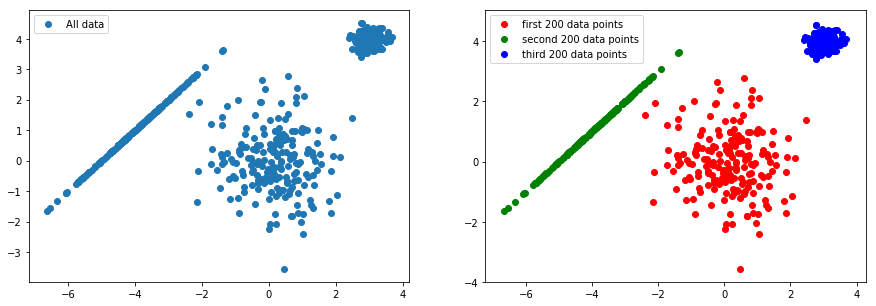

In [15]:
axes = ScatterPlots()
plt.show()

In [16]:
# lets use the dataset that was loaded in previous exercise

# lets use only 1 variable from each dataset
x = Y[:,0] # we take all observations for Weight (in Lbs) (.T command is used for transposing a numpy array)
y = X[:,0] # take all observations for Chins, save to lowercase y
x = x*0.453 # convert Lbs to Kg

x = x.reshape(-1, 1) # reshape from shape (20,) to (20, 1)
y = y.reshape(-1, 1) # reshape from shape (20,) to (20, 1)

print(x.shape)
print(y.shape)

(20, 1)
(20, 1)


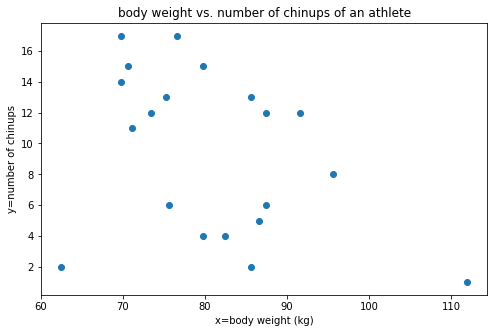

In [17]:
fig, axes = plt.subplots(1, 1, figsize=(8,5))
axes.scatter(x,y)

# YOUR CODE HERE
#raise NotImplementedError()

axes.set_title('body weight vs. number of chinups of an athlete')
axes.set_xlabel('x=body weight (kg)')
axes.set_ylabel('y=number of chinups')

plt.show() # show the plot


### Learning the Best Predictor by Fitting a Model

<a id="Q5"></a>

## Fitting Models to Data - Learning from Data

Consider the `Linnerud dataset` above which consists of data about the performance of persons. Each data point of this dataset represents an athlete doing some exercise. We could be interested in how certain properties or features of a person affect the level of performance. In particular, we might be interested in predicting the typical number of chin-ups that a person can do depending on her (or his) body weight. 

We can formalize this as a machine learning problem with data points characterized by the feature $x$ being the body weight in kg and the label $y$ being the number of chin-ups the person can do. Our goal is to find a predictor function $h(x)$ which takes the body weight $x$ as input and outputs a predicted label $\hat{y}$ which is the anticipated (or guesses) number of chin-ups that the athlete shoudl be able to do. 

Choosing a good predictor $h(x)$ from the space of all possible functions $h(\cdot): \mathbb{R} \rightarrow \mathbb{R}$ is challenging since there are [**so many** of these functions](https://en.wikipedia.org/wiki/Function_of_a_real_variable#Cardinality_of_sets_of_functions_of_a_real_variable). Therefore, we restrict ourselves to the space of linear functions
\begin{equation}
h^{(w)}(x) = w \cdot x. 
\end{equation} 
The set of all of such functions, obtained for different choices for $w$, constitutes the hypothesis space of linear predictors. 
Each function of this **hypothesis space** is characterized by a single number $w \in \mathbb{R}$. Once we specify this number (or weight), we can compute the function value $h^{(w)}(x)$ for any possible feature value $x$. 

<a id='HypothesisDemo'></a>
<div class=" alert alert-info">
    <b>Demo.</b> Hypothesis Space of Linear Predictor Functions.  
    
The code snippet below creates a scatterplot of the `Linnerud` dataset and also plots 
some of the predictor functions from the linear hypothesis space. These predictor functions 
are of the form $h(x) = w \cdot x$ with given weight $w$.

Hint: In this section we will use the Python library [Scikit-learn (Sklearn)](https://scikit-learn.org/stable/index.html) to fit models to data.

</div>

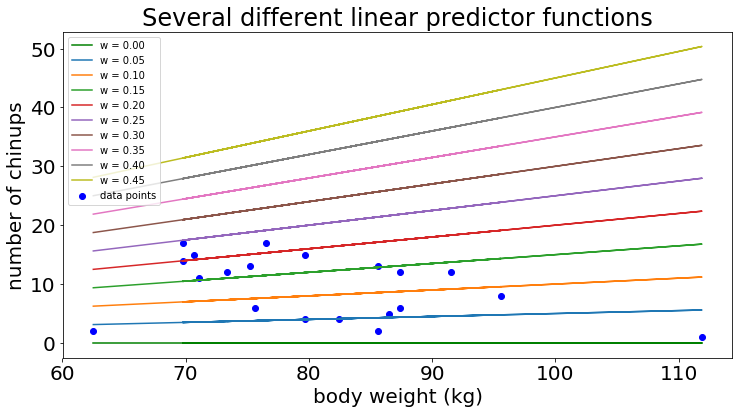

In [23]:
from sklearn import linear_model

reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit(x,y)

hypothesis_space = []
for i in range(0, 10):
    reg.coef_ = np.array([[i*0.05]])
    n = reg.predict(x)
    hypothesis_space.append(n)

fig, axes = plt.subplots(1, 1, figsize=(12, 6))
    

axes.scatter(x, y, color='blue',label="data points")
axes.plot(x, hypothesis_space[0], color='green',label='w = {:.2f}'.format(0*0.05))

for i in range(len(hypothesis_space)-1):
    y_n = hypothesis_space[i+1]
    l = 'w = {:.2f}'.format((i+1)*0.05)
    axes.plot(x, y_n, label=l)

plt.rc('legend', fontsize=10) 
plt.rc('axes', labelsize=20) 
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.rc('font', size=20)

axes.set_title('Several different linear predictor functions')
axes.set_xlabel('body weight (kg)')
axes.set_ylabel('number of chinups')
axes.legend(loc='upper left')
plt.show()

<a id='FitRegressionDemo'></a>
<div class=" alert alert-info">
    <b>Demo.</b> Fitting a Linear Model to Data.  

The code snippet below loads features and labels of data points of the `Linnerud`data set and stores them into the numpy arrays `x`and `y`. The $i$th entry of these numpy array is the feature $x^{(i)}$ and true label $y^{(i)}$, respectively, of the $i$th data point. We then use the Python class `LinearRegression` to fit a linear model to this data points. 

A linear model corresponds to the set of linear predictor $h(x) = w \cdot x$ whose weight $w$ is optimized using the function `LinearRegression.fit()` in order to minimize the prediction error $y-h(x)$. The optimal weight $w_{\rm opt}$ is computed by the function `LinearRegression.fit()` and the corresponding prediction $\hat{y} = w_{\rm opt} x$ for a data point with feature $x$ can be computed using `LinearRegression.predict()`. 

We plot the data points along with the predictions $\hat{y}^{(i)} = w_{\rm opt} x^{(i)}$ and the prediction errors $y^{(i)} - \hat{y}^{(i)} = y^{(i)} - w_{\rm opt} x^{(i)}$ as red bars. 

</div>

optimal weight w = [[0.11143529]]


Text(0, 0.5, 'label y (number of chin-ups)')

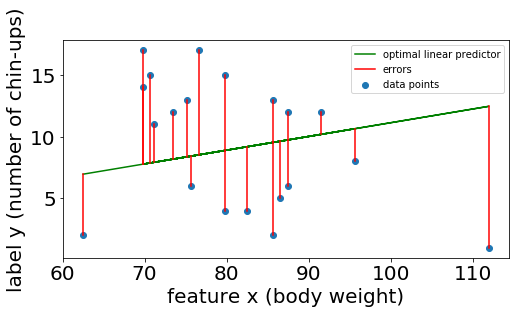

In [24]:
from sklearn import linear_model
from sklearn.datasets import make_regression

linnerud = datasets.load_linnerud()  # load Linnerud dataset into dictionary `linnerud`
X = linnerud['data']    # read out feature vectors stored under key 'data' 
Y = linnerud['target']  # read out label values stored under key 'target' 

x = Y.T[0] # weight (in Lbs) for each athlete 
y = X.T[0] # number of chin ups for each athlete
x = x.reshape(-1,1)  # convert to numpy array of shape (m,1)
y = y.reshape(-1,1)  # convert to numpy array of shape (m,1)
x = x*0.453 # convert Lbs to Kg


# plot regression dataset

plt.rc('font', size=20)

reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit(x, y)
y_pred = reg.predict(x)

print("optimal weight w =", reg.coef_)


fig, axes = plt.subplots(1, 1, figsize=(8, 4))
axes.scatter(x, y, label='data points')
axes.plot(x, y_pred, color='green', label='optimal linear predictor')


# indicate error bars

axes.plot((x[0], x[0]), (y[0], y_pred[0]), color='red', label='errors') # add label to legend
for i in range(len(x)-1):
    lineXdata = (x[i+1], x[i+1]) # same X
    lineYdata = (y[i+1], y_pred[i+1]) # different Y
    axes.plot(lineXdata, lineYdata, color='red')

axes.legend()
axes.set_xlabel("feature x (body weight)")
axes.set_ylabel("label y (number of chin-ups)")
    
    